In [16]:
# import plotly components for offline display of diagrams
from IPython.display import display, HTML
import plotly.offline as offline
from plotly.graph_objs import *


# enable latex-mathsymbols in plotly
offline.init_notebook_mode(connected=True)

# The polling here is to ensure that plotly.js has already been loaded before
# setting display alignment in order to avoid a race condition.
display(HTML(
    '<script>'
        'var waitForPlotly = setInterval( function() {'
            'if( typeof(window.Plotly) !== "undefined" ){'
                'MathJax.Hub.Config({ SVG: { font: "STIX-Web" }, displayAlign: "center" });'
                'MathJax.Hub.Queue(["setRenderer", MathJax.Hub, "SVG"]);'
                'clearInterval(waitForPlotly);'
            '}}, 250 );'
    '</script>'
))

import pandas as pd
from selected_features_boosting import selected_features_boosting
from sklearn.externals import joblib

TRAITS = ['agr', 'con', 'ext', 'neu', 'ope']

# Predicting brand personalities

Using the crawled brand posts, we calculated LIWC features. Now we can perform personality prediction (big5 traits) using our best predictor.

## Keyfigures of the crawled data

In [17]:
df = pd.read_csv('LIWC_results.csv', encoding="UTF-8", index_col=0)
keyfigures = df[['Segment','WC','Analytic','Clout','Authentic','Tone','WPS', 'Sixltr', 'Dic', 'function', 'pronoun', 'ppron', 'i', 'we', 'you', 'shehe', 'they', 'ipron', 'article', 'prep', 'auxverb', 'adverb', 'conj', 'negate', 'verb', 'adj', 'compare', 'interrog', 'number', 'quant', 'affect', 'posemo', 'negemo', 'anx', 'anger', 'sad', 'social', 'family', 'friend', 'female', 'male', 'cogproc', 'insight', 'cause', 'discrep', 'tentat', 'certain', 'differ', 'percept', 'see', 'hear', 'feel', 'bio', 'body', 'health', 'sexual', 'ingest', 'drives', 'affiliation', 'achieve', 'power', 'reward', 'risk', 'focuspast', 'focuspresent', 'focusfuture', 'relativ', 'motion', 'space', 'time', 'work', 'leisure', 'home', 'money', 'relig', 'death', 'informal', 'swear', 'netspeak', 'assent', 'nonflu', 'filler', 'AllPunc', 'Period', 'Comma', 'Colon', 'SemiC', 'QMark', 'Exclam', 'Dash', 'Quote', 'Apostro', 'Parenth', 'OtherP']]
keyfigures
prediction_data = df[(df['Segment'] > 0)].reset_index()
prediction_data = prediction_data.drop(['Filename', 'Segment'], axis=1).reset_index()
#prediction_data.describe()


Using the selected features from [Validation of selected features](https://hub.benedikt1992.de:8000/notebooks/Validation%20of%20Selected%20Features.ipynb) we can now predict the brands personality using different models:

- SVM (SVR)
- Decission Tree (Gradient Boosting)
- Neural Network

## SVM:

In [7]:
from cv_svr import RAND_SEED

svr_prediction = pd.DataFrame(columns=['Filename', *TRAITS], index=range(0, len(prediction_data)))
svr_prediction['Filename'] = prediction_data['Filename']
prediction_data.describe()

# scale features
scaler = joblib.load("data/cv/scaler.model")
X_predict.describe()
X_predict = scaler.transform(X_predict)
X_predict = pd.DataFrame(X_predict, columns = prediction_data.columns[1:]) # features columns without the brand name
    
for trait in TRAITS:
    name = trait + "_" + trait + "_" + str(RAND_SEED)
    model_name = "data/cv/boosted/univariate_svr_rbf_" + name + ".model"
    clf = joblib.load(model_name)
    
    # perform prediction based on selected features
    svr_prediction[trait] = clf.predict(X_predict[[*selected_features_boosting[trait]]])

svr_prediction.head()

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:14: DataConversionWarning:

Data with input dtype int64, float64 were all converted to float64 by StandardScaler.



ValueError: operands could not be broadcast together with shapes (1058,94) (93,) (1058,94) 

In [5]:
traces = []
for trait in TRAITS:
    traces.append(Bar(
        x = svr_prediction['brand'],
        y = svr_prediction[trait],
        name = trait,
        visible = 'legendonly'
    ))
traces[0].visible = True

layout = Layout(
    title = 'SVR Prediction results',
    xaxis = dict(type='lin', title='Brand'),
    yaxis = dict(type='lin', title='Trait Score')
)
fig = dict(data = traces, layout=layout)
offline.iplot(fig)

NameError: name 'svr_prediction' is not defined

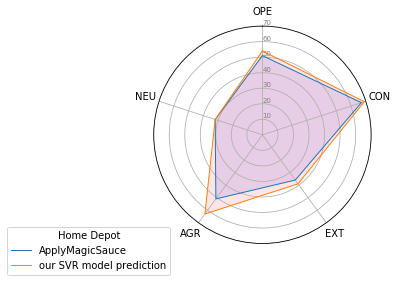

In [7]:
import matplotlib.pyplot as plt
import pandas as pd
from math import pi
 
plt.clf()    
    
# Set data
df = pd.DataFrame({
'OPE': [51, 54],
'CON': [67, 69],
'EXT': [36, 39],
'AGR': [51, 63],
'NEU': [32, 32]
})
 
# ------- PART 1: Create background
 
# number of variable
categories=list(df)[:]
N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([10,20,30,40,50,60,70], ["10","20","30","40","50","60","70"], color="grey", size=7)
plt.ylim(0,70)
 
 
# ------- PART 2: Add plots
 
# Plot each individual = each line of the data
# I don't do a loop, because plotting more than 3 groups makes the chart unreadable
 
# Ind1
values=df.loc[0].values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="ApplyMagicSauce")
ax.fill(angles, values, 'b', alpha=0.1)
 
# Ind2
values=df.loc[1].values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="our SVR model prediction")
ax.fill(angles, values, 'r', alpha=0.1)
 
# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1), title='Home Depot')
plt.savefig("home_depot.svg",bbox_inches="tight")


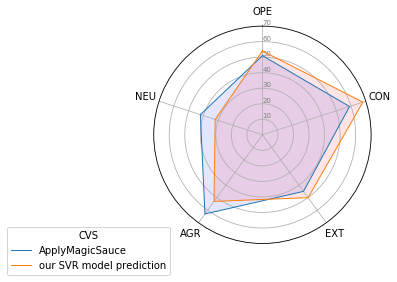

In [9]:
import matplotlib.pyplot as plt
import pandas as pd
from math import pi
 
plt.clf()
    
# Set data
df = pd.DataFrame({
'OPE': [51, 54],
'CON': [59, 68],
'EXT': [45, 50],
'AGR': [63, 53],
'NEU': [42, 32]
})
 
# ------- PART 1: Create background
 
# number of variable
categories=list(df)[:]
N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([10,20,30,40,50,60,70], ["10","20","30","40","50","60","70"], color="grey", size=7)
plt.ylim(0,70)
 
 
# ------- PART 2: Add plots
 
# Plot each individual = each line of the data
# I don't do a loop, because plotting more than 3 groups makes the chart unreadable
 
# Ind1
values=df.loc[0].values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="ApplyMagicSauce")
ax.fill(angles, values, 'b', alpha=0.1)
 
# Ind2
values=df.loc[1].values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="our SVR model prediction")
ax.fill(angles, values, 'r', alpha=0.1)
 
# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1), title='CVS')
plt.savefig("cvs.svg",bbox_inches="tight")
